<a href="https://colab.research.google.com/github/butchland/fastai_xla_extensions/blob/master/explore_nbs/test_latest_fastai2_tpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
assert os.environ['COLAB_TPU_ADDR'], 'Make sure to select TPU from Edit > Notebook settings > Hardware accelerator'

In [2]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
# !pip install torch==1.6.0+cu101 torchvision==0.7.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html > /dev/null


In [ ]:
# !pip install torch torchvision --upgrade > /dev/null



In [3]:
!pip install fastai2 --upgrade 

     |████████████████████████████████| 184kB 3.5MB/s 


In [4]:
!pip install git+https://github.com/butchland/fastai_xla_extensions

  Cloning https://github.com/butchland/fastai_xla_extensions to /tmp/pip-req-build-xr87r3kr
  Running command git clone -q https://github.com/butchland/fastai_xla_extensions /tmp/pip-req-build-xr87r3kr
     |████████████████████████████████| 61kB 2.1MB/s 
  Created wheel for fastai-xla-extensions: filename=fastai_xla_extensions-0.0.1-cp36-none-any.whl size=10373 sha256=e2b2c7586c25d0de7e0d508028f0f6fffb99c80d6ac70c5b630610647d4de78d
  Stored in directory: /tmp/pip-ephem-wheel-cache-_8d121sw/wheels/3c/d5/c1/7a96c15b4e74b5d1ec0bc6c29fcaf36501791ce2d9a88a8cea
Successfully built fastai-xla-extensions


In [5]:
!pip freeze | grep fastai2
!pip freeze | grep torch
!pip freeze | grep fastai-xla-extensions

fastai2==0.0.21
torch==1.6.0+cu101
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.7.0+cu101
fastai-xla-extensions==0.0.1


In [6]:
VERSION = "20200516"  #@param ["1.5" , "20200516", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5115  100  5115    0     0  23571      0 --:--:-- --:--:-- --:--:-- 23571
Updating... This may take around 2 minutes.
Updating TPU runtime to pytorch-dev20200516 ...
     |████████████████████████████████| 61kB 2.6MB/s 
Uninstalling torch-1.6.0+cu101:
  Found existing installation: google-api-python-client 1.7.12
    Uninstalling google-api-python-client-1.7.12:
      Successfully uninstalled google-api-python-client-1.7.12
Done updating TPU runtime
  Successfully uninstalled torch-1.6.0+cu101
Uninstalling torchvision-0.7.0+cu101:
  Successfully uninstalled torchvision-0.7.0+cu101
Copying gs://tpu-pytorch/wheels/torch-nightly+20200516-cp36-cp36m-linux_x86_64.whl...
- [1 files][ 91.0 MiB/ 91.0 MiB]                                                
Operation completed over 1 objects/91.0 MiB.                                     


In [7]:
!pip freeze | grep fastai2
!pip freeze | grep torch
!pip freeze | grep fastai-xla-extensions

fastai2==0.0.21
torch==1.6.0a0+83df3be
torch-xla==1.6+2191422
torchsummary==1.5.1
torchtext==0.3.1
torchvision==0.7.0a0+348dd5a
fastai-xla-extensions==0.0.1


In [8]:
# import warnings
# warnings.filterwarnings('ignore')

In [9]:
import fastai_xla_extensions.core

In [10]:
from fastai2.vision.all import *

In [11]:
import torch_xla.core.xla_model as xm

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
Path.BASE_PATH = path

In [ ]:
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
# batch_tfms = [*aug_transforms(do_flip=False,size=28,min_scale=0.9, max_warp=0.2, max_rotate=5,max_zoom=1.2), Normalize]
# img_size=50
batch_tfms = []
img_size = 28

In [ ]:
datablock = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name='training',valid_name='testing'),
    item_tfms=Resize(img_size),
    batch_tfms=batch_tfms
)

In [ ]:
default_device()

device(type='xla', index=1)

In [ ]:
datablock.summary(path)

Setting-up type transforms pipelines
Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/mnist_png/training/6/37905.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize
    starting from
      /root/.fastai/data/mnist_png/training/6/37905.png
    applying parent_label gives
      6
    applying Categorize gives
      TensorCategory(6)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(6))


Setting up after_item: Pipeline: Resize -> ToTensor
Setting up before_batch: Pipeline: 
Setting up after_batch: Pipeline: IntToFloatTensor

Building one batch
Applying item_tfms to the first sample:
  Pipeline: Resize -> ToTensor
    starting from
      (PILImage mode=RGB size=28x28, TensorCategory(6))
    applying Resize gives
      (PILImage mode=RGB size=28x2

In [ ]:
default_device()

device(type='xla', index=1)

In [ ]:
# bs = 256
bs = 768

In [ ]:
dls = datablock.dataloaders(path, bs=bs)

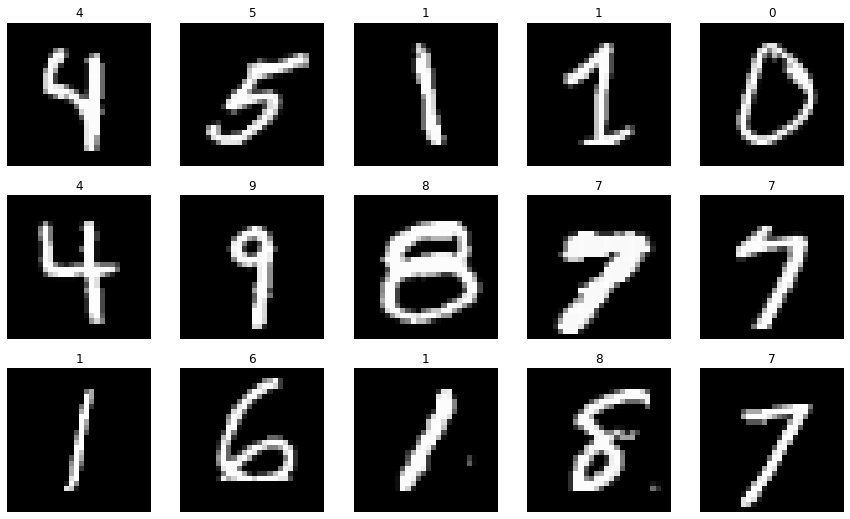

In [ ]:
dls.show_batch(max_n=15)

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=[accuracy, error_rate])

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learner.fine_tune(4, freeze_epochs=4)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.058311,1.012075,0.701700,0.298300,01:45
1,1.189883,0.612240,0.812300,0.187700,01:14
2,0.770559,0.441896,0.863600,0.136400,01:15
3,0.527609,0.340926,0.893800,0.106200,01:15


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.201341,0.107784,0.968100,0.031900,01:30
1,0.090453,0.066153,0.979600,0.020400,01:17
2,0.037279,0.059338,0.982600,0.017400,01:16
3,0.015904,0.058830,0.982000,0.018000,01:15


In [ ]:
learner.save('stage-1')

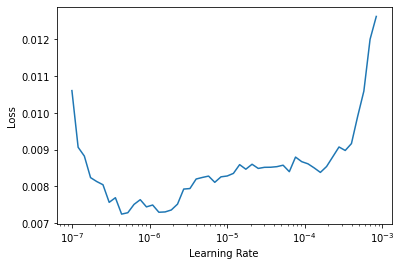

In [ ]:
lr_min, lr_steep = learner.lr_find()

In [ ]:
(lr_min, lr_steep)

(1.318256749982538e-07, 1.0964781722577754e-06)

In [ ]:
learner.fit_one_cycle(4, lr_max=slice(lr_min, lr_steep), wd=1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.008804,0.058471,0.982900,0.017100,01:26
1,0.008483,0.058826,0.982500,0.017500,01:15
2,0.008074,0.058915,0.982900,0.017100,01:14
3,0.008061,0.058370,0.982800,0.017200,01:14


In [ ]:
learner.save('stage-2a')


In [ ]:
learner.load('stage-1');


In [ ]:
learner.fit_one_cycle(4, lr_max=slice(6.31e-7,8e-6), wd=2e-2, pct_start=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.008259,0.058054,0.982800,0.017200,01:15
1,0.007663,0.057607,0.983100,0.016900,01:14
2,0.007802,0.057433,0.982900,0.017100,01:14
3,0.006753,0.057742,0.982700,0.017300,01:14


In [ ]:
learner.save('stage-2b')

In [ ]:
learner.load('stage-1');

In [ ]:
learner.fit_one_cycle(3, lr_max=slice(6.31e-7,8e-6), wd=2e-2, pct_start=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.032312,0.029460,0.989800,0.010200,01:12
1,0.034658,0.026621,0.991100,0.008900,01:12
2,0.034737,0.027720,0.990300,0.009700,01:12


In [ ]:
learner.save('stage-2c')

In [ ]:
learner.load('stage-1');

In [ ]:
learner.fit_one_cycle(2, lr_max=slice(6.31e-7,8e-6), wd=2e-2, pct_start=0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.032539,0.027570,0.990500,0.009500,01:12
1,0.032076,0.028717,0.989700,0.010300,01:12


In [ ]:
learner.save('stage-2d')

SuggestedLRs(lr_min=6.309573450380412e-08, lr_steep=2.2908675418875646e-06)

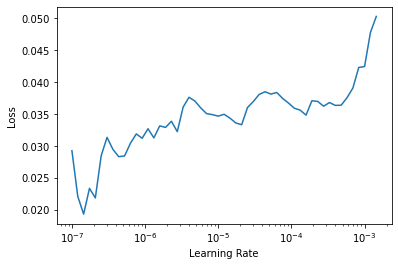

In [ ]:
learner.lr_find()

In [ ]:
learner.fit(2, lr=1e-7,wd=1e-2)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.030729,0.029484,0.989500,0.010500,01:12
1,0.031673,0.027634,0.990300,0.009700,01:11


In [ ]:
learner.save('stage-2d-3a')

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

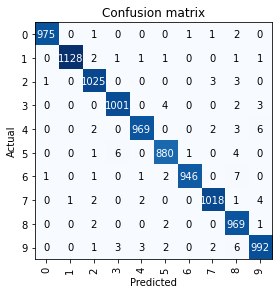

In [ ]:
interp.plot_confusion_matrix()

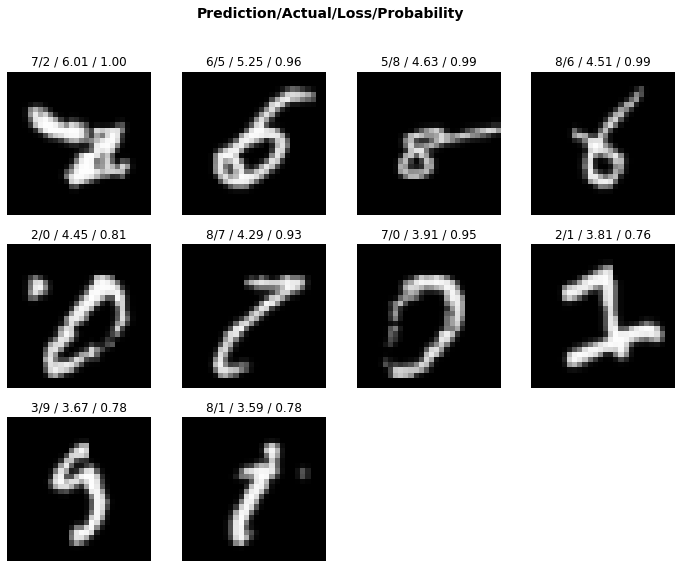

In [ ]:
interp.plot_top_losses(10)

In [ ]:
interp.most_confused(min_val=3)

[('6', '8', 7),
 ('4', '9', 6),
 ('5', '3', 6),
 ('9', '8', 6),
 ('3', '5', 4),
 ('5', '8', 4),
 ('7', '9', 4),
 ('2', '7', 3),
 ('2', '8', 3),
 ('3', '9', 3),
 ('4', '8', 3),
 ('9', '3', 3),
 ('9', '4', 3)]